# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rizki Baehtiar Afandi
- **Email:** rzkibhtrafnd09@gmail.com
- **ID Dicoding:** rzkibhtrafnd

## Menentukan Pertanyaan Bisnis

- What is the total sales in 2016, 2017, and 2018. Is there an increase every year?
- Create a distribution of average monthly orders in 2016-2018. In which months is the highest and lowest average order?
- Show the top 10 product categories with the highest total orders from 2016-2018!
- Show the Top 5 highest sellers by City?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
order_items_dataset = './data/order_items_dataset.csv'
order_item = pd.read_csv(order_items_dataset)
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
orders_dataset = './data/orders_dataset.csv'
orders = pd.read_csv(orders_dataset)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
product_category_name_translation = './data/product_category_name_translation.csv'
product_category = pd.read_csv(product_category_name_translation)
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [13]:
products_dataset = './data/products_dataset.csv'
product = pd.read_csv(products_dataset)
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [15]:
sellers_dataset = './data/sellers_dataset.csv'
sellers = pd.read_csv(sellers_dataset)
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- I called the E-commerce public Dataset data provided by Dicoding.
- I used 5 data including Order_items, Order, Product_Category, Product, and Sellers.
- All data was successfully gathered, then we will assess the Data.

### Assessing Data

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [19]:
orders.duplicated().sum()

0

In [21]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [23]:
order_item.duplicated().sum()

0

In [25]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [27]:
product_category.duplicated().sum()

0

In [29]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [31]:
product.duplicated().sum()

0

In [33]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [35]:
sellers.duplicated().sum()

0

**Insight:**
- All data does not contain duplicates.
- There are several columns that are NULL in the Orders, Order_item, and Product tables.

### Cleaning Data

In [37]:
#Handle missing values
orders = orders.fillna({'order_approved_at': 'Unknown', 'order_delivered_carrier_date': 'Unknown', 'order_delivered_customer_date': 'Unknown'})
order_item = order_item.fillna({'price': order_item['price'].mean(), 'freight_value': order_item['freight_value'].mean()})
product = product.fillna({'product_weight_g': product['product_weight_g'].mean(), 'product_length_cm': product['product_length_cm'].mean(), 
                           'product_height_cm': product['product_height_cm'].mean(), 'product_width_cm': product['product_width_cm'].mean()})

In [39]:
orders.info()
order_item.info()
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 

In [41]:
# Convert data types
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [43]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- Resolved NULL values ​​by filling columns with Nan values ​​in the orders Dataframe with 'Unknown', and columns with Nan values ​​in the order_item and product Dataframes with the average of those columns.
- Converted some columns in the orders Dataframe to datetime format with error handling to convert invalid dates to Nat if necessary.

## Exploratory Data Analysis (EDA)

### Explore data orders, order_item, and product

In [45]:
orders.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [47]:
order_item.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [49]:
product.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4281.908773,16.913945,13.637140,12.078681
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


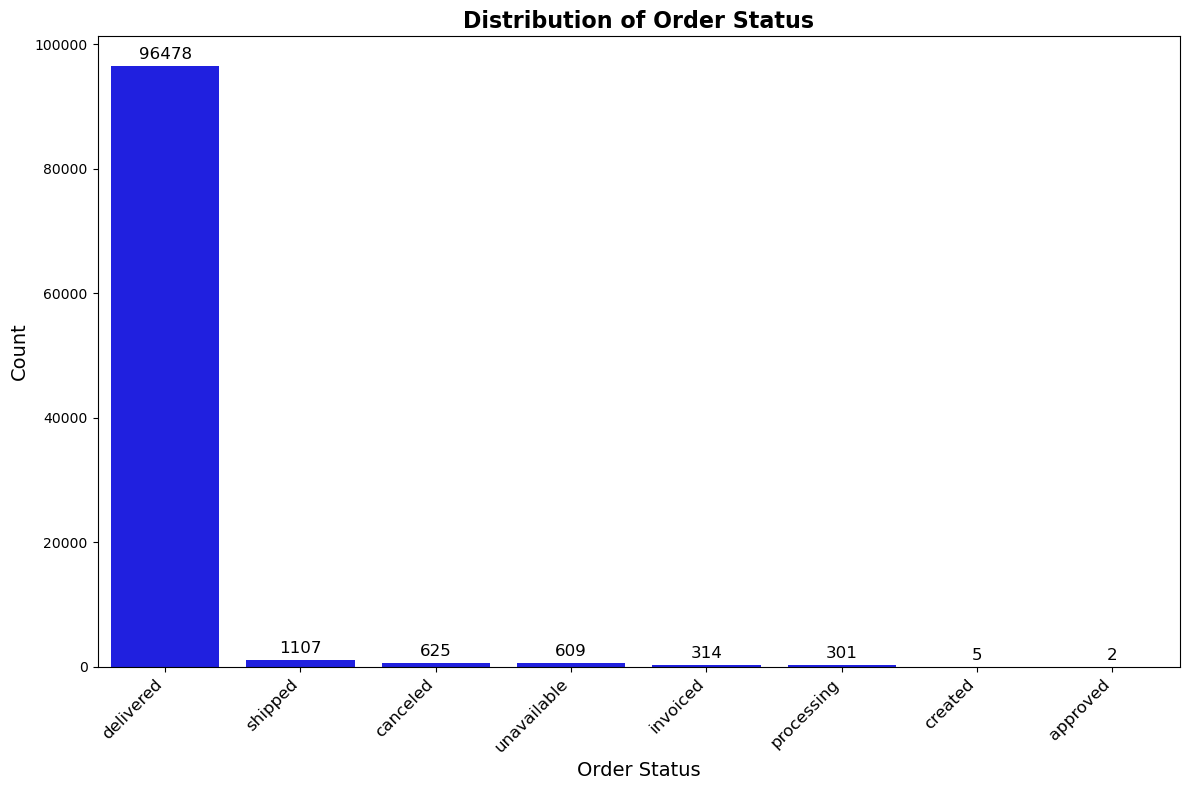

In [63]:
# Distribution of order status
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=orders, x='order_status', 
                   order=orders['order_status'].value_counts().index, color='blue')

# Add data labels on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Rotate x-axis labels 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=12)

# Set title and labels
plt.title('Distribution of Order Status', fontsize=16, fontweight='bold')
plt.xlabel('Order Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

**Insight:**
- The average order purchase date was December 31, 2017, while the average customer ship date was January 14, 2018, indicating an average delivery time of about two weeks after purchase.
- The average item price was around $120.65 with an average shipping cost of $19.99, while item prices could vary widely from $0.85 to $6735.00.
- The products had an average weight of 2276.47 grams and average dimensions (length, height, width) of 30.82 cm, 16.94 cm, and 23.20 cm respectively, with significant variation in product weight and size.
- All Order Statuses have been received and are ready for visualization and explanatory analysis.

## Visualization & Explanatory Analysis

### What is the total sales in 2016, 2017, and 2018. Is there an increase every year?

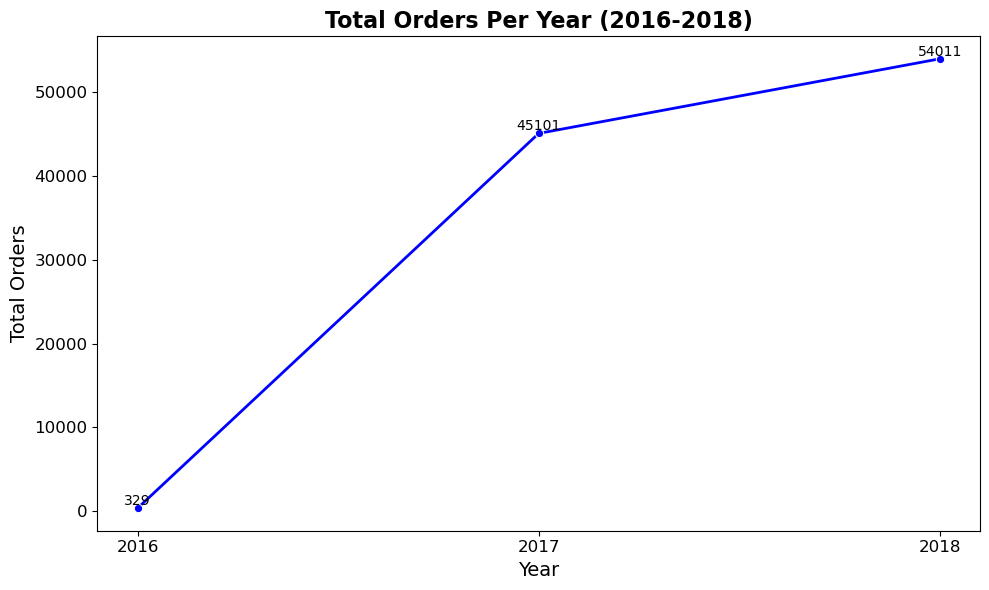

In [51]:
# Convert order_purchase_timestamp to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Extract year and count orders per year
orders['year'] = orders['order_purchase_timestamp'].dt.year
total_orders_yearly = orders.groupby('year').size().reset_index(name='total_orders')

# Filter for only 2016, 2017, and 2018
filtered_orders = total_orders_yearly[total_orders_yearly['year'].isin([2016, 2017, 2018])]

# Plot lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_orders, x='year', y='total_orders', marker='o', color='b', linewidth=2)

# Add data labels to the plot
for x, y in zip(filtered_orders['year'], filtered_orders['total_orders']):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Total Orders Per Year (2016-2018)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Orders', fontsize=14)

# Explicitly set x-ticks for 2016, 2017, and 2018
plt.xticks([2016, 2017, 2018], fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Create a distribution of average monthly orders in 2016-2018. In which months is the highest and lowest average order?

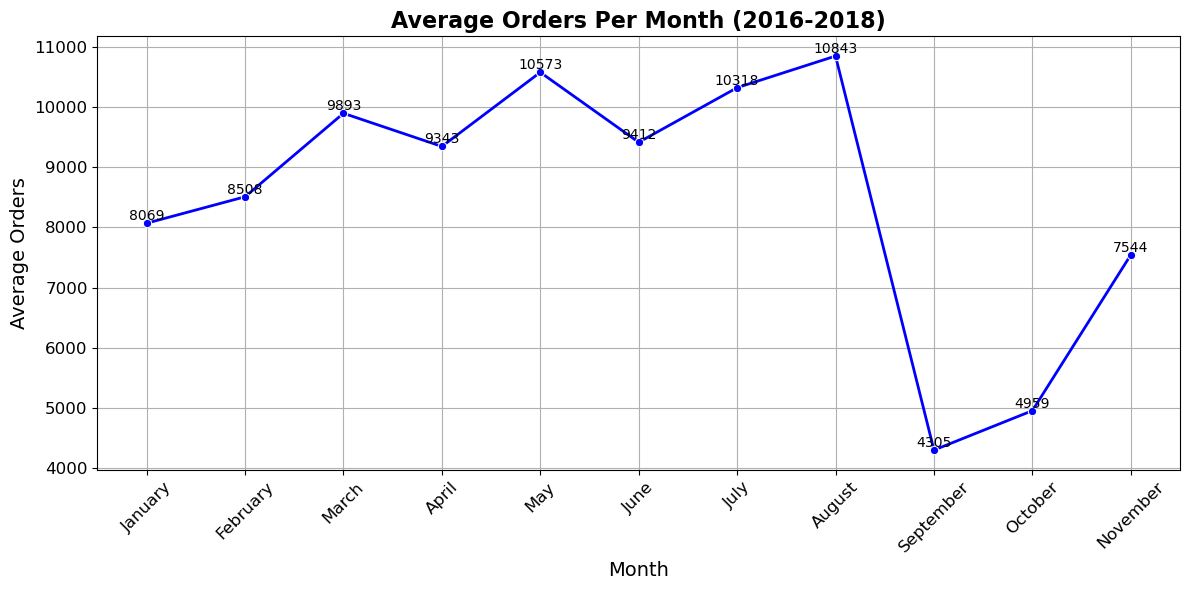

In [53]:
# Convert timestamp to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Filter data from 2016 to 2018
orders = orders[(orders['order_purchase_timestamp'].dt.year >= 2016) & (orders['order_purchase_timestamp'].dt.year <= 2018)]

# Extract month and year, then calculate average orders per month
orders['month'] = orders['order_purchase_timestamp'].dt.month_name()
orders['year'] = orders['order_purchase_timestamp'].dt.year
avg_orders_monthly = orders.groupby(['month'])['order_id'].count().reset_index(name='average_orders')

# Ensure months are ordered correctly and add missing months if needed
month_order = pd.Series(pd.date_range('2024-01', '2024-12', freq='ME').strftime('%B')).tolist()
avg_orders_monthly = avg_orders_monthly.set_index('month').reindex(month_order, fill_value=0).reset_index()
avg_orders_monthly.rename(columns={'index': 'month'}, inplace=True)

# Plot with data labels
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_orders_monthly, x='month', y='average_orders', marker='o', color='blue', linewidth=2)

# Add data labels to the plot
for x, y in zip(avg_orders_monthly['month'], avg_orders_monthly['average_orders']):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Average Orders Per Month (2016-2018)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Orders', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

### Show the top 10 product categories with the highest total orders from 2016-2018!

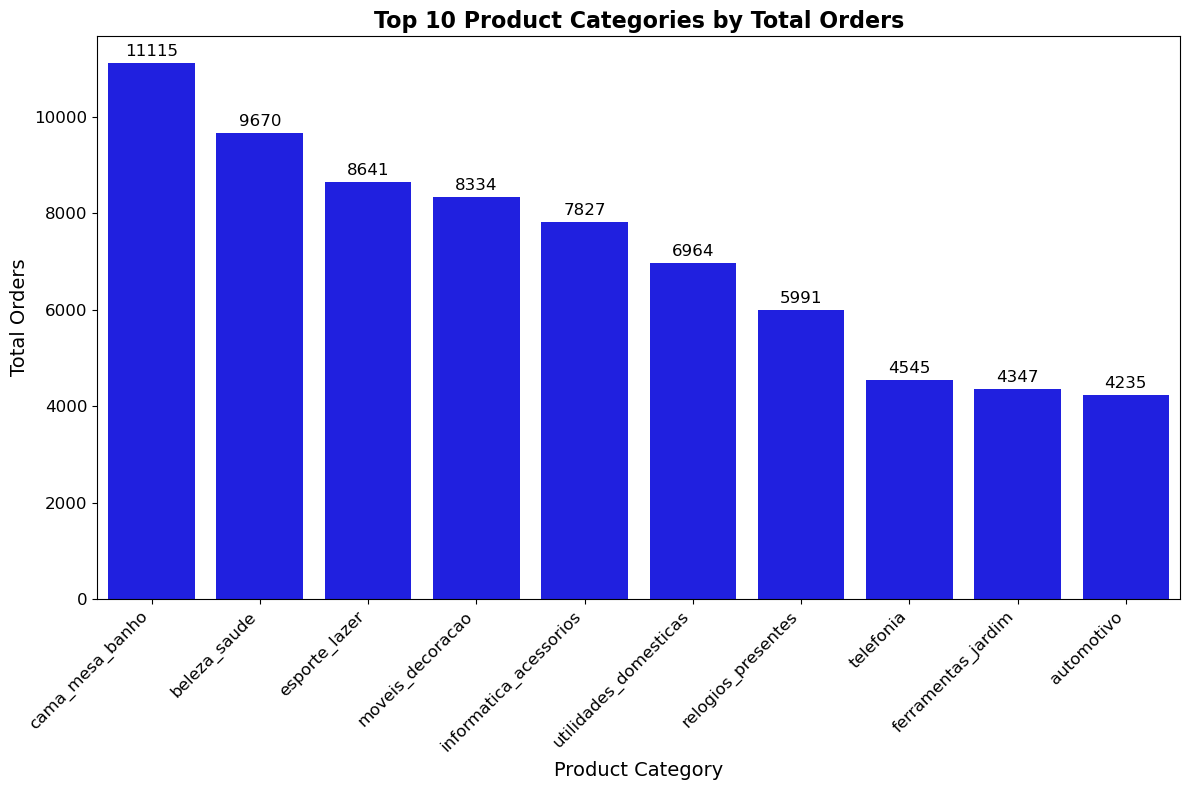

In [57]:
# Merge data to get product categories
merged_data = order_item.merge(product[['product_id', 'product_category_name']], on='product_id')
top_categories = merged_data['product_category_name'].value_counts().head(10).reset_index()
top_categories.columns = ['product_category_name', 'total_orders']

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_categories, x='product_category_name', y='total_orders', color='blue')

# Add data labels on the bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Set title and labels
plt.title('Top 10 Product Categories by Total Orders', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Orders', fontsize=14)

# Rotate x-axis labels 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Show the Top 5 highest sellers by City?

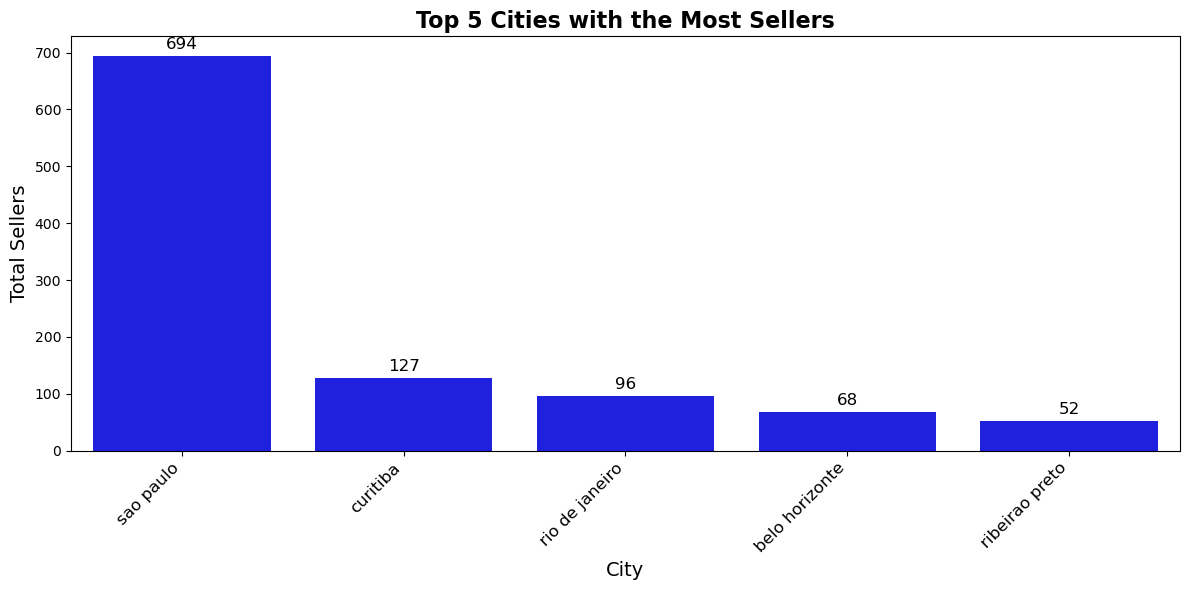

In [59]:
# Count sellers per city
top_seller_cities = sellers['seller_city'].value_counts().head(5).reset_index()
top_seller_cities.columns = ['seller_city', 'total_sellers']

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_seller_cities, x='seller_city', y='total_sellers', color='blue')

# Add data labels on the bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
# Set title and labels
plt.title('Top 5 Cities with the Most Sellers', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Sellers', fontsize=14)

# Rotate x-axis labels 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

**Insight:**
There was a continuous increase in total orders from 2016-2018. The highest total orders occurred in 2018 with 54011 orders.
- There was a fluctuation or up and down in the average order from January - August, but there was a sharp decline in August to September, and rose again in October - November. The highest average order occurred in August with 10843 orders and the lowest in September with 4305 orders.
- The first Top 10 Product Category is Cama_mesa_banho with a total order of 11115 and Automotivo top 10 with a total order of 4235.
- The Top 5 Cities with the highest sellers are Sao Paulo, Curitiba, Rio de Janeiro, Belo Horizonte, and Riberiao Preto. Sao Paulo is the city with the highest seller reaching 694.

## Analisis Lanjutan (Opsional)

In [65]:
# Combine order and order_item data
merged_data = pd.merge(orders, order_item, on='order_id')

# Convert time column to datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])
merged_data['order_approved_at'] = pd.to_datetime(merged_data['order_approved_at'])
merged_data['order_delivered_carrier_date'] = pd.to_datetime(merged_data['order_delivered_carrier_date'])
merged_data['order_delivered_customer_date'] = pd.to_datetime(merged_data['order_delivered_customer_date'])
merged_data['order_estimated_delivery_date'] = pd.to_datetime(merged_data['order_estimated_delivery_date'])

# Calculate RFM
rfm_df = merged_data.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  
    "order_id": "nunique",              
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Calculate recency
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])
recent_date = merged_data["order_purchase_timestamp"].max()
rfm_df["recency"] = (recent_date - rfm_df["max_order_timestamp"]).dt.days

# Drop columns that are not needed
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,292
1,000161a058600d5901f007fab4c27140,1,54.90,413
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,551
3,0002414f95344307404f0ace7a26f1d5,1,149.90,382
4,000379cdec625522490c315e70c7a9fb,1,93.00,153


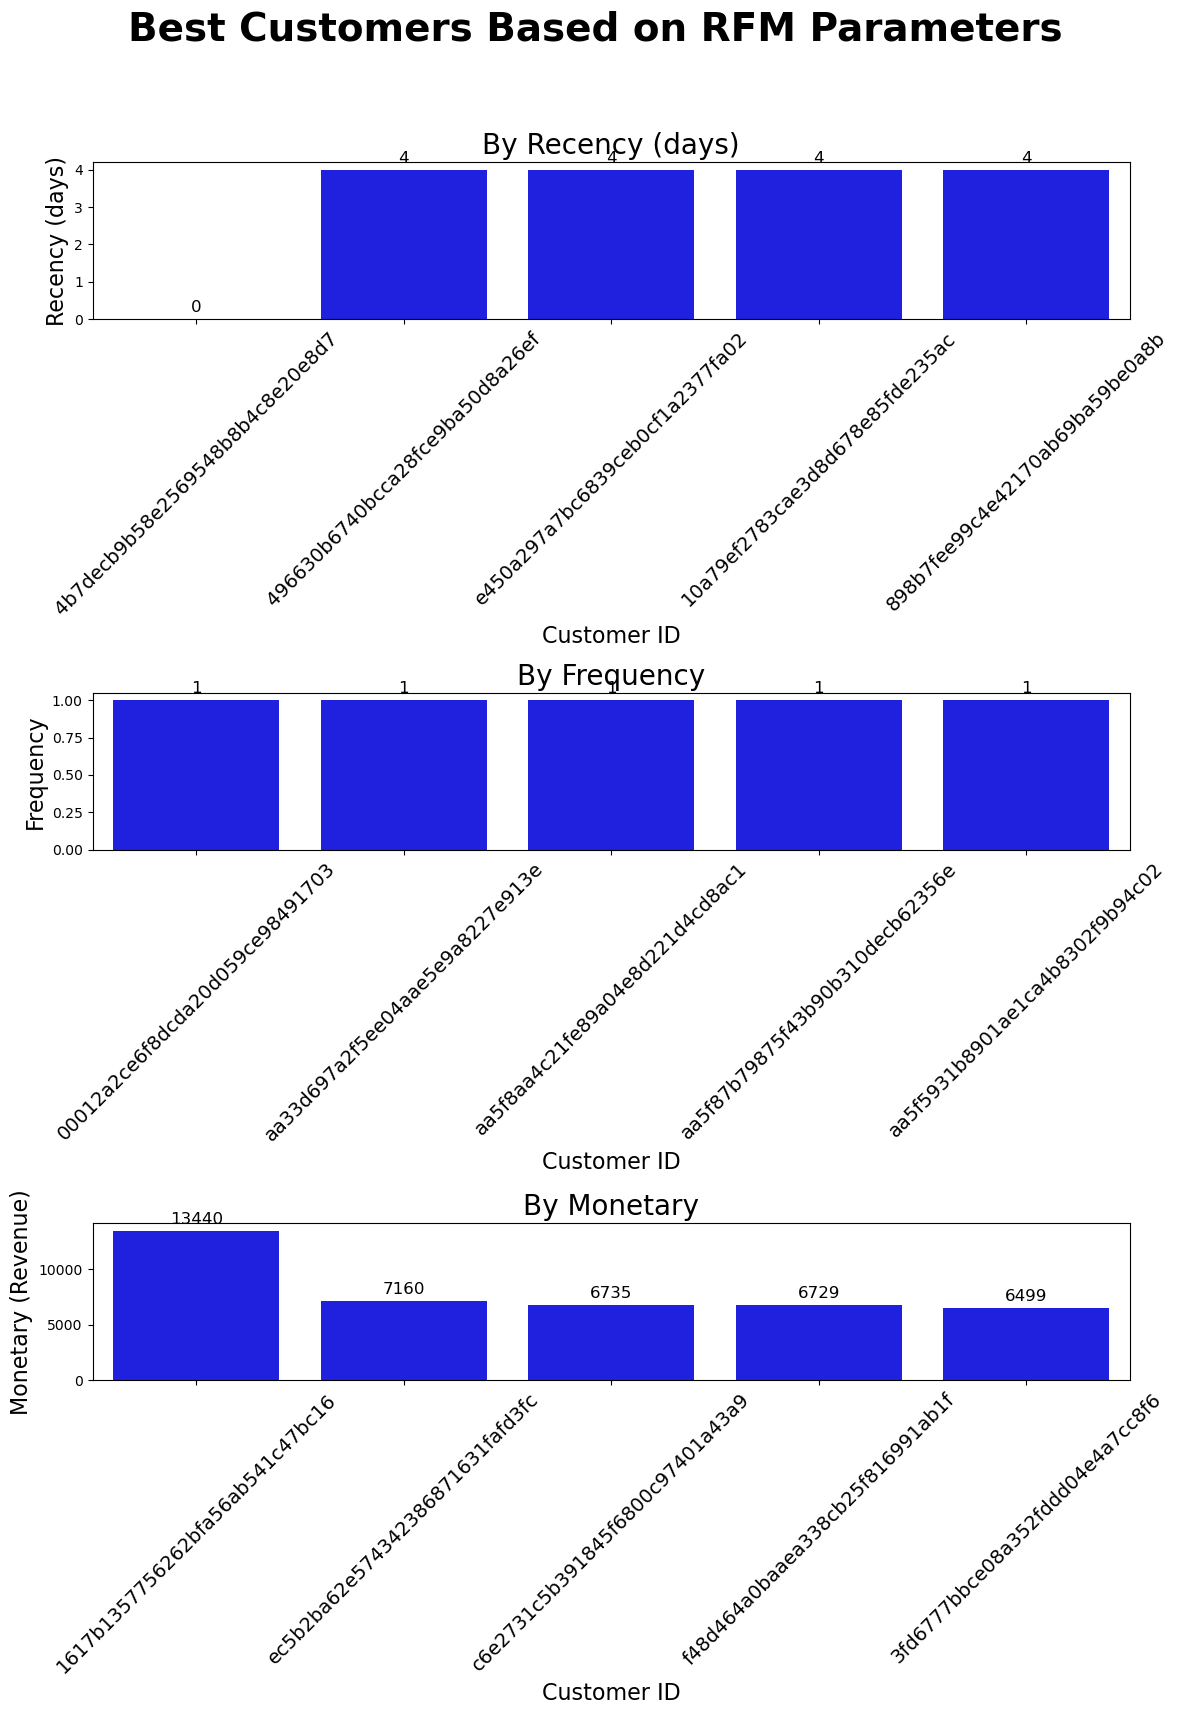

In [71]:
# Specifies a larger image size
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))
color = "blue"

# Visualization for Recency
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), color=color, ax=ax[0])
ax[0].set_ylabel('Recency (days)', fontsize=16)
ax[0].set_xlabel('Customer ID', fontsize=16)
ax[0].set_title("By Recency (days)", fontsize=20)
ax[0].tick_params(axis='x', labelsize=14, rotation=45)

# Add label data to Recency
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                   textcoords='offset points')

# Visualization for Frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), color=color, ax=ax[1])
ax[1].set_ylabel('Frequency', fontsize=16)
ax[1].set_xlabel('Customer ID', fontsize=16)
ax[1].set_title("By Frequency", fontsize=20)
ax[1].tick_params(axis='x', labelsize=14, rotation=45)

# Add label data to Frequency
for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                   textcoords='offset points')

# Visualization for Monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), color=color, ax=ax[2])
ax[2].set_ylabel('Monetary (Revenue)', fontsize=16)
ax[2].set_xlabel('Customer ID', fontsize=16)
ax[2].set_title("By Monetary", fontsize=20)
ax[2].tick_params(axis='x', labelsize=14, rotation=45)

# Add label data to Monetary
for p in ax[2].patches:
    ax[2].annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                   textcoords='offset points')

# Added main title
plt.suptitle("Best Customers Based on RFM Parameters", fontsize=28, fontweight='bold')

# Adjusted the layout to avoid overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## Conclusion

- Conclusion of question 1
Orders are quite good, increasing every year.
- Conclusion of question 2
Conduct a deeper analysis related to the drastic decline from August to September. Create a discount event on twin dates and months to increase orders every month.
- Conclusion of question 3
Provide better offers to product categories that have low orders. Then, provide more detailed consultation by adding services to the highest product category to continue to increase sales.
- Conclusion of question 4
Create more advertisements in cities with the lowest sellers.